# Assignment

Solutions

1. Overexposure to sunlight is [damaging to coral reefs](https://aambpublicoceanservice.blob.core.windows.net/oceanserviceprod/facts/coralbleaching-large.jpg). Which is more important for monitoring coral reefs, RSR or DSR? Why? [10 pts]

When ocean temperatures are high, higher levels of shortwave radiation leads to bleaching in shallow-water corals. It would be helpful to know surface quantities of shortwave radiation to monitor the health of the coral reef. The Downward Shortwave Radiation (DSR) product does just that. In practice, coral reef researchers are most interested in [photosynthetically active radiation](https://en.wikipedia.org/wiki/Photosynthetically_active_radiation) (PAR) which spans 400-700 nm. However, this product is no longer generated from the GOES-16/-17/-18 satellites by NOAA.

2. What impact will the following have on an RSR value and why? [35 pts]

* Cloud-free: Clouds reflect shortwave radiation, so regions with lots of clouds increase the RSR values. Thus, cloud-free regions will have lower RSR values.
* Dark rainforest: Dark surfaces absorb SW radiation (a similar effect to wearing dark clothing versus white clothing in the summer), so less SW will be reflected upwards. Thus, the RSR values will be lower over a rainforest.
* Stratospheric ozone (hint ozone absorbs shortwave radiation): Ozone absorbs SW radiation, thus less reaches the surface and is subsequently reflected upwards. This will cause lower RSR values.
* The sun is directly overhead: More sunlight means more available SW radiation to reflect upwards, so this will cause an increase in RSR.
* The local time is midnight: No sunlight means the energy source of RSR does not exist. Thus, the RSR values are zero.
* Thin cirrus clouds: Unlike thick clouds, thin clouds are fairly transparent to SW radiation. Thus, these regions will likely have lower RSR values when compared with thick-cloud regions.

3. Using the template below as a guide, create a plot of *DSR* ('ABI-L2-DSRF') on a Nov 22, 2022 at 18:00 UTC. Refer to the original tutorial to fill in the missing portions. [40 pts]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import s3fs
import cartopy.crs as ccrs

In [2]:
fs = s3fs.S3FileSystem(anon=True)

In [3]:
bucket_name = 'noaa-goes16'
product_name = 'ABI-L2-DSRF'
year = 2022
doy = 324
hour = 18

path = bucket_name + '/' + product_name + '/' + str(year) + '/' + str(doy).zfill(3) + '/' + str(hour).zfill(2) + '/'
print(path)

noaa-goes16/ABI-L2-DSRF/2022/324/18/


In [4]:
# If this is empty, check the path above!
files = fs.ls(path)
print(files)

['noaa-goes16/ABI-L2-DSRF/2022/324/18/OR_ABI-L2-DSRF-M6_G16_s20223241800206_e20223241809514_c20223241828473.nc']


In [16]:
# Open adn then read the file
# Note: you'll have to inspect the contents and find the DSR variable
remote_obj = fs.open(files[0], mode='rb')
abi_L2 = xr.open_dataset(remote_obj, engine='h5netcdf')

In [17]:
lat = abi_L2.lat.values
lon = abi_L2.lon.values

In [7]:
# Project the 1D grid into 2D
X, Y = np.meshgrid(lon, lat)

In [14]:
# abi_L2.DSR.values[abi_L2.DQF != 0] = np.nan

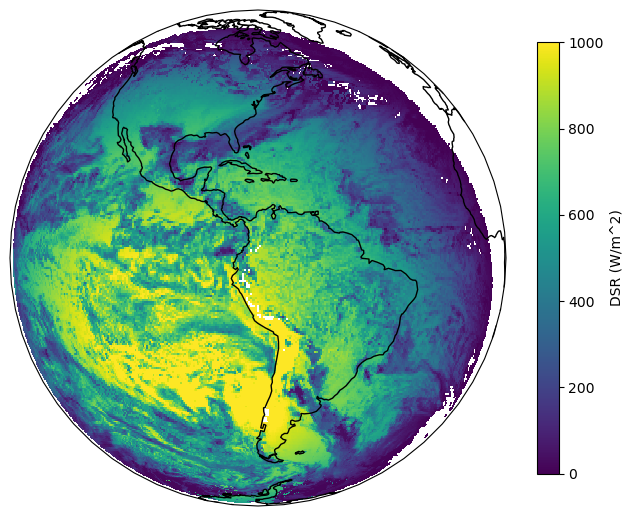

In [24]:
plt.figure(figsize=[8,8])

ax = plt.subplot(projection=ccrs.Orthographic(central_longitude=-75.2))
ax.coastlines()
ax.set_global()

tmp = ax.pcolormesh(X, Y, abi_L2.DSR, transform=ccrs.PlateCarree(), vmin=0, vmax=1000)
plt.colorbar(tmp, shrink=0.7, label='DSR (W/m^2)')

plt.show()

4. Identify the high/low measurements of DSR in your plot and speculate what atmospheric features could be causing these values. [15 pts]

Low DSR values:
* Thick clouds reflect shortwave radiation, so less reaches the surface.
* The north eastern edge is darker. This is the "solar terminator" and the sun is setting in the west and night is beginning in the east.

High DSR values:
* Small solar zenith angle (the sun is overhead), it's summertime in the southern hemisphere based on the date (Nov 22), so more SW radiation reaches the surface. DSR is higher.
* Cloud-free regions

Little/no impact:
* The surface albedo does not impact the DSR values. This is because the DSR retrieval measures the amount of SW radiation that reaches the surface, not the amount reflected off the surface. 
* Ozone absorption can impact DSR values, and if there's an ozone hole the DSR would be lower. However, the [ozone hole is primarily observed over Antarctica](https://ozonewatch.gsfc.nasa.gov/monthly/SH.html) and is [largest in September/October](https://ozonewatch.gsfc.nasa.gov/meteorology/figures/ozone/to3areas_2022_toms+omi+omps.pdf). Antarctica is out the GOES-16 ABI field of view, so we do not observe any of these effects in our figure above.